#**Emotions Detection Model**

In [ ]:
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install pandas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

In [ ]:
# Load the dataset
data = pd.read_excel('/content/Emotions_DS.xlsx')

In [ ]:
data.shape

(5247, 5)

In [ ]:
data.head()

,ID,Type,Utterance,Dialogue_Act,Emotion
0,194_0,T,"Hi. Alvina, how are you doing today? It's good...",gt,0
1,194_1,P,I'm just tired.,gt,-1
2,194_2,T,just tired?,crq,0
3,194_3,P,Yeah,cd,-1
4,194_4,T,"you know, we did some pre visit planning with ...","gc, irq",0


<Axes: >

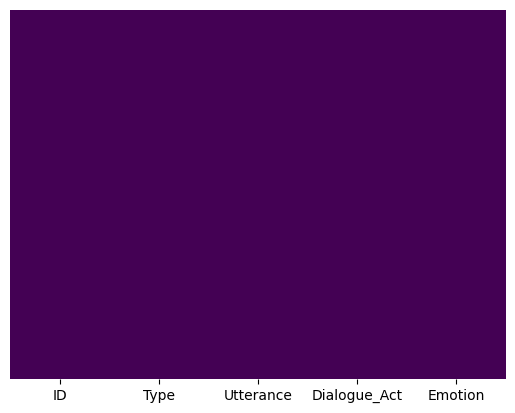

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [ ]:
data['Dialogue_Act'].unique()

array(['gt', 'crq', 'cd', 'gc, irq', 'id', 'gc', 'irq', 'yq', 'op',
       'ap, gc', 'ack', 'gc, yq', 'orq', 'od', 'gc, orq', 'id, irq',
       'cv, gc', 'cr', 'ack, gc', 'on', 'cv', 'op, yq', 'gt, id',
       'gc, op', 'gc, crq', 'gc, yp', 'gc, id', 'gc, orq,irq', 'od, id',
       'gc, id,yq', 'comp', 'crq, gc', 'gc, cd,id', 'gc, id,orq',
       'op, id', 'id, yq', 'irq, yq', 'ack, id,irq', 'ack, id', 'ack, yq',
       'gt, irq', 'ap, irq', 'gc irq', 'ack, irq', 'ack, cv', 'gc, cv',
       'cd, id', 'gc, id,irq', 'ack, cd', 'ack, orq', 'gc, od,id',
       'id, cv', 'gc, ack', 'vc', 'ci', 'ap', 'ap, od,gc', 'cr, id',
       'id, crq'], dtype=object)

In [ ]:
data['Emotion'].unique()

array([ 0, -1,  1, -2, -3,  2,  9])

In [ ]:
data['Emotion'].value_counts()

,count
Emotion,
0,4098
-1,727
-2,177
-3,166
1,64
2,13
9,2


In [ ]:
data['Dialogue_Act'].value_counts()

,count
Dialogue_Act,
gc,1234
id,1073
irq,587
cd,470
crq,451
yq,271
op,270
ack,210
gt,132


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

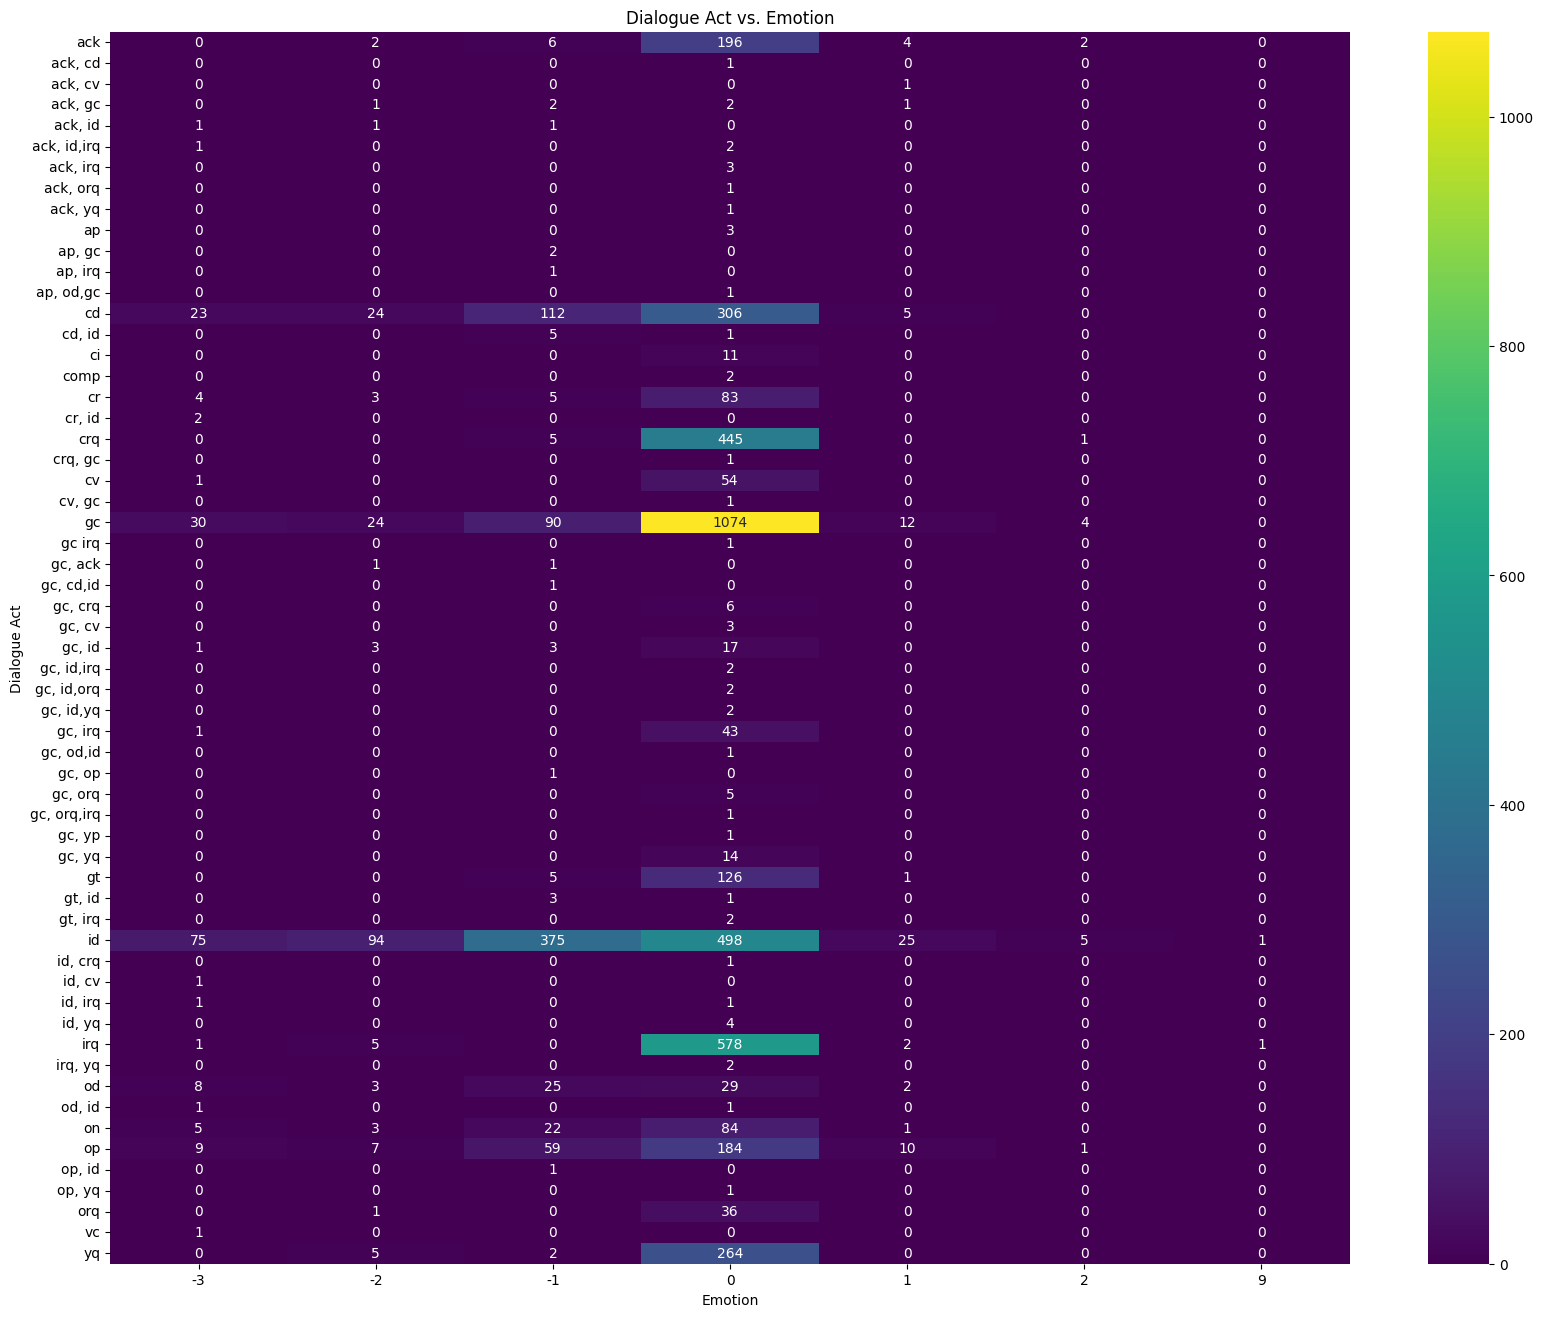

In [ ]:
# Heatmap for Dialogue Act vs. Emotion
plt.figure(figsize=(20, 16))
pivot_table = data.pivot_table(index='Dialogue_Act', columns='Emotion', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='d')
plt.title('Dialogue Act vs. Emotion')
plt.xlabel('Emotion')
plt.ylabel('Dialogue Act')
plt.show()

##**> Preprocessing the Data**

###Converted the Utterance into tokenized inputs for BERT, and label encode the Emotion column.

In [ ]:
# Extract input (Utterance) and target (Emotion)
X = data['Utterance'].values
y = data['Emotion'].values

In [ ]:
# Label encode 'Emotion', 'Dialogue_Act', and 'Type'
label_encoder_emotion = LabelEncoder()
label_encoder_dialogue_act = LabelEncoder()
label_encoder_type = LabelEncoder()

y = label_encoder_emotion.fit_transform(y)
dialogue_act_encoded = label_encoder_dialogue_act.fit_transform(data['Dialogue_Act'])
type_encoded = label_encoder_type.fit_transform(data['Type'])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test, dialogue_act_train, dialogue_act_test, type_train, type_test = train_test_split(X, y, dialogue_act_encoded, type_encoded, test_size=0.2, random_state=42)

In [ ]:
# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Tokenize the utterances (based on your updated code)
def tokenize_data(text_list):
    return tokenizer(
        text_list,  # The input is already a list
        padding=True,        # Pad to the longest sequence
        truncation=True,     # Truncate sequences longer than max length
        max_length=128,      # Limit sequence length to 128 tokens
        return_tensors='pt'  # Return PyTorch tensors
    )

In [ ]:
train_encodings = tokenize_data(X_train.astype(str).tolist()) # Convert X_train to a list of strings
test_encodings = tokenize_data(X_test.astype(str).tolist())   # Convert X_test to a list of strings

##**> Prepared the Dataset Class for Pytorch**

###Created a PyTorch dataset that can handle Utterance, Dialogue_Act, Type, and the emotion labels.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, encodings, dialogue_act, speaker_type, labels):
        self.encodings = encodings
        self.dialogue_act = dialogue_act
        self.speaker_type = speaker_type
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['dialogue_act'] = torch.tensor(self.dialogue_act[idx], dtype=torch.long)
        item['speaker_type'] = torch.tensor(self.speaker_type[idx], dtype=torch.long)
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Initialize datasets and data loaders
train_dataset = EmotionDataset(train_encodings, dialogue_act_train, type_train, y_train)
test_dataset = EmotionDataset(test_encodings, dialogue_act_test, type_test, y_test)

##**> Custom BERT Model with Embeddings**

###Defined a custom model that uses BERT for the text part and embeddings for Dialogue_Act and Type.

In [ ]:
import torch.nn as nn
from transformers import BertModel

In [ ]:
class BertWithAdditionalFeatures(nn.Module):
    def __init__(self, bert_model, dialogue_act_vocab_size, type_vocab_size, embedding_dim, num_labels):
        super(BertWithAdditionalFeatures, self).__init__()
        self.bert = bert_model

        # Embedding layers for Dialogue_Act and Type
        self.dialogue_act_embedding = nn.Embedding(dialogue_act_vocab_size, embedding_dim)
        self.type_embedding = nn.Embedding(type_vocab_size, embedding_dim)

        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(bert_model.config.hidden_size + 2 * embedding_dim, num_labels)

    def forward(self, input_ids, attention_mask, dialogue_act, speaker_type):
        # Get BERT embeddings
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # Use pooled output from BERT

        # Get embeddings for Dialogue_Act and Type
        dialogue_act_embedded = self.dialogue_act_embedding(dialogue_act)
        type_embedded = self.type_embedding(speaker_type)

        # Concatenate BERT output with Dialogue_Act and Type embeddings
        combined_output = torch.cat((pooled_output, dialogue_act_embedded, type_embedded), dim=1)

        # Pass through a fully connected layer
        output = self.fc(self.dropout(combined_output))

        return output

##**> Prepared the Data for Training**

###Set up the optimizer, criterion (loss function), and data loaders for training.

In [ ]:
from transformers import AdamW
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

In [ ]:
# Training parameters
batch_size = 16
learning_rate = 5e-5
epochs = 3

In [ ]:
# Initialize data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Initialize the BERT model and the custom model
bert_model = BertModel.from_pretrained('bert-base-uncased')
model = BertWithAdditionalFeatures(
    bert_model=bert_model,
    dialogue_act_vocab_size=len(label_encoder_dialogue_act.classes_),
    type_vocab_size=len(label_encoder_type.classes_),
    embedding_dim=16,  # Choose a size for the embedding
    num_labels=len(label_encoder_emotion.classes_)
)

In [ ]:
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

BertWithAdditionalFeatures(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
# # Initialize optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate)
criterion = CrossEntropyLoss()

##**> Training**

###Loop over the data, feed it into the model, and update the weights.

In [ ]:
# Training loop
model.train()  # Set the model to training mode

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for batch in tqdm(train_loader):
        # Move batch to GPU if available
        batch = {k: v.to(device) for k, v in batch.items()}

        # Forward pass
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            dialogue_act=batch['dialogue_act'],
            speaker_type=batch['speaker_type']
        )
        loss = criterion(outputs, batch['labels'])

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Loss: {loss.item()}")

Epoch 1/3


100%|██████████| 263/263 [01:26<00:00,  3.06it/s]


Loss: 0.34741973876953125
Epoch 2/3


100%|██████████| 263/263 [01:24<00:00,  3.13it/s]


Loss: 0.6222463846206665
Epoch 3/3


100%|██████████| 263/263 [01:24<00:00,  3.13it/s]

Loss: 0.12475860118865967


##**> Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluation mode
model.eval()

predictions, true_labels = [], []

with torch.no_grad():  # Disable gradient calculation for evaluation
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}

        # Forward pass
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            dialogue_act=batch['dialogue_act'],
            speaker_type=batch['speaker_type']
        )

        # Get predicted labels
        logits = outputs
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8162


In [ ]:
# Detailed classification report
target_names = [str(class_) for class_ in label_encoder_emotion.classes_]

report = classification_report(true_labels, predictions, target_names=target_names)
print(report)

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        26
          -2       0.31      0.28      0.29        39
          -1       0.50      0.50      0.50       147
           0       0.90      0.93      0.91       827
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.82      1050
   macro avg       0.24      0.24      0.24      1050
weighted avg       0.79      0.82      0.80      1050



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert predictions and true labels into a DataFrame
df_results = pd.DataFrame({
    'Actual_value': label_encoder_emotion.inverse_transform(true_labels),  # Convert back to original labels
    'Predicted_value': label_encoder_emotion.inverse_transform(predictions)  # Convert back to original labels
})

# Display the DataFrame
print(df_results.head())
df_results.shape

   Actual_value  Predicted_value
0            -1               -2
1             0                0
2            -3               -1
3            -1                0
4             0                0


(1050, 2)

In [ ]:
# Filter where the model's prediction was wrong
df_incorrect = df_results[df_results['Actual_value'] != df_results['Predicted_value']]

# Show the incorrect predictions
print(df_incorrect.head())
df_incorrect.shape

    Actual_value  Predicted_value
0             -1               -2
2             -3               -1
3             -1                0
12            -1                0
13            -2               -1


(193, 2)

##**Predictions on New Sample**

In [ ]:
# New sample
new_sample = {
    "Utterance": "Well, I feel like just looking at that I've that cake. I feel like I just want to run out the door. I just don't want to be here.",
    "Dialogue_Act": "od",
    "Type": "P"
}

In [ ]:
# Tokenize the new utterance
new_utterance_encoding = tokenize_data([new_sample['Utterance']])

In [ ]:
# Encode Dialogue_Act and Type
encoded_dialogue_act = torch.tensor(label_encoder_dialogue_act.transform([new_sample['Dialogue_Act']]), dtype=torch.long)
encoded_type = torch.tensor(label_encoder_type.transform([new_sample['Type']]), dtype=torch.long)

In [ ]:
# Ensure the model is in evaluation mode
model.eval()

# Prepare input for the model
with torch.no_grad():
    input_ids = new_utterance_encoding['input_ids'].to(device)
    attention_mask = new_utterance_encoding['attention_mask'].to(device)
    dialogue_act = encoded_dialogue_act.to(device)
    speaker_type = encoded_type.to(device)

    # Get the model's output (predicted emotion)
    output = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        dialogue_act=dialogue_act,
        speaker_type=speaker_type
    )

    # Convert output logits to predicted label
    predicted_emotion_idx = torch.argmax(output, dim=1).cpu().numpy()[0]

    # Decode the predicted label back to the emotion name
    predicted_emotion = label_encoder_emotion.inverse_transform([predicted_emotion_idx])[0]

# Print the predicted emotion
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: -1
